<center><h1>**Kelompok 4**<h1></center>
<center>November 26, 2023</center>
<center><h1>Klasifikasi Gambar Peralatan Dapur<h1></center>



*   Muhamad Sabil Fausta (2210142)
*   Muhammad Alfi Faiz (2207045)
*   Muhammad Rafie Alhabsyi Setiawan (2202400)
*   Rifa Sania (2206697)
*   Setyawan Humay Senja (2203874)







## Import Library

In [1]:
# import library yang diperlukan
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Load Dataset

In [2]:
# karena dataset tersimpan di google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# path dataset
dataset_path = "/content/gdrive/MyDrive/Klasifikasi Alat Masak/PERALATAN_DAPUR"

# Muat dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(dataset_path)

# Ambil nama kelas
class_names = dataset.class_names

# Tampilkan nama kelas
print("Nama Kelas:", class_names)

# Hitung jumlah gambar per kelas
class_counts = {class_name: len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in class_names}

# Tampilkan jumlah gambar per kelas
print("\nJumlah Gambar per Kelas:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} ")

Found 375 files belonging to 5 classes.
Nama Kelas: ['Blender', 'Panci', 'Pisau dapur', 'Rice cooker', 'Wajan']

Jumlah Gambar per Kelas:
Blender: 75 
Panci: 75 
Pisau dapur: 75 
Rice cooker: 75 
Wajan: 75 


dataset ini berisi 5 kelas yaitu ['Blender', 'Panci', 'Pisau dapur', 'Rice cooker', 'Wajan'] dimana setiap kelasnya memiliki 75 gambar

In [4]:
#split dataset
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Klasifikasi Alat Masak/PERALATAN_DAPUR",
    validation_split=0.2,
    subset="training",
    seed=123)
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Klasifikasi Alat Masak/PERALATAN_DAPUR",
    validation_split=0.2,
    subset="validation",
    seed=123)

Found 375 files belonging to 5 classes.
Using 300 files for training.
Found 375 files belonging to 5 classes.
Using 75 files for validation.


80% dataset dipakai untuk training, 20% sisa dataset dipakai untuk validation

sehingga 300 gambar dipakai untuk training dan 75 gambar dipakai untuk validation

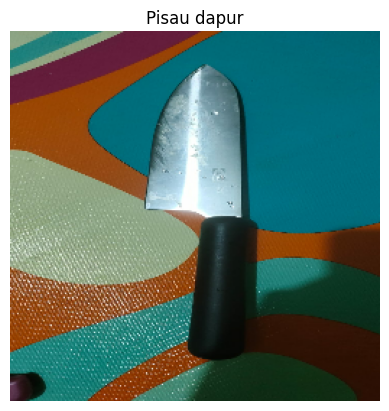

In [5]:
# Ambil satu batch dari dataset
for images, labels in dataset.take(1):
    # Ambil gambar pertama dari kelas "Pisau dapur"
    pisau_dapur_images = images[labels == class_names.index('Pisau dapur')]

# Tampilkan gambar pertama dari kelas "Pisau dapur"
plt.imshow(pisau_dapur_images[0].numpy().astype("uint8"))
plt.title("Pisau dapur")
plt.axis("off")
plt.show()

preview gambar dari kelas pisau dapur

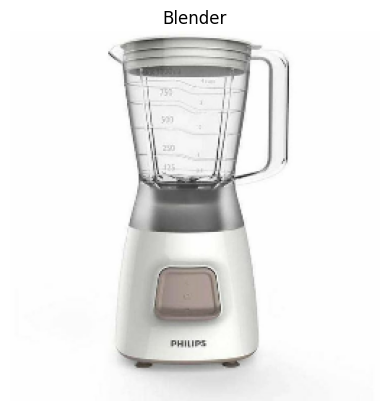

In [6]:
# Ambil satu batch dari dataset
for images, labels in dataset.take(1):
    # Ambil gambar pertama dari kelas "Blender"
    Blender_images = images[labels == class_names.index('Blender')]

# Tampilkan gambar pertama dari kelas "Blender"
plt.imshow(Blender_images[0].numpy().astype("uint8"))
plt.title("Blender")
plt.axis("off")
plt.show()

preview gambar dari kelas Blender

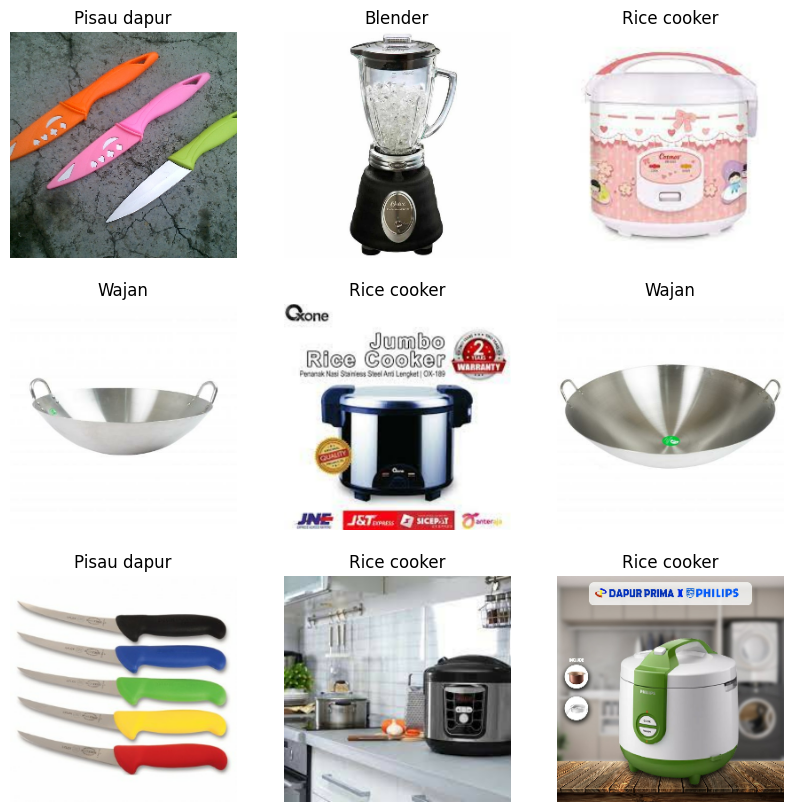

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
 for i in range(9):
   ax = plt.subplot(3, 3, i + 1) # 3 baris, 3 kolom
   plt.imshow(images[i].numpy().astype("uint8"))
   plt.title(class_names[labels[i]])
   plt.axis("off")

Preview dataset train

shape dari data train

In [8]:
for image_batch, labels_batch in ds_train:
 print(image_batch.shape)
 print(labels_batch.shape)
 break

(32, 256, 256, 3)
(32,)


normalisasi RGB menjadi 0 sd 1

In [14]:
# normalisasi nilai RGB
normalization_layer = layers.Rescaling(1./255)
normalized_ds = ds_train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# nilai dari [0 sd 255] menjadi [0 sd 1]
print(np.min(first_image), np.max(first_image))


0.11688231 1.0


Reshape gambar agar ukuran pixelnya sama semua, menjadi 180x180

In [15]:
new_image_size = (180, 180)

# fungsi untuk reshape gambar
def reshape_images(images, labels):
    # Reshape gambar
    reshaped_images = tf.image.resize(images, new_image_size)
    return reshaped_images, labels

# reshape gambar dari dataset training
ds_train = ds_train.map(reshape_images)

# reshape gambar dari dataset validation
ds_validation = ds_validation.map(reshape_images)

## Membuat Model

In [16]:
# Buat model
model = tf.keras.models.Sequential([

  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(180, 180, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
epochs=10
history = model.fit(
 ds_train,
 validation_data=ds_validation,
 epochs=epochs
)

Epoch 1/10
10/10 [==============================] - 13s 687ms/step - loss: 2.8233 - accuracy: 0.2133 - val_loss: 1.7663 - val_accuracy: 0.1733
Epoch 2/10
10/10 [==============================] - 12s 954ms/step - loss: 1.3095 - accuracy: 0.4800 - val_loss: 1.1647 - val_accuracy: 0.5467
Epoch 3/10
10/10 [==============================] - 11s 741ms/step - loss: 0.9697 - accuracy: 0.6667 - val_loss: 0.8681 - val_accuracy: 0.6267
Epoch 4/10
10/10 [==============================] - 14s 1s/step - loss: 0.6687 - accuracy: 0.8200 - val_loss: 0.6754 - val_accuracy: 0.7333
Epoch 5/10
10/10 [==============================] - 8s 648ms/step - loss: 0.4823 - accuracy: 0.8633 - val_loss: 0.7849 - val_accuracy: 0.6800
Epoch 6/10
10/10 [==============================] - 11s 747ms/step - loss: 0.3703 - accuracy: 0.8867 - val_loss: 0.5273 - val_accuracy: 0.8133
Epoch 7/10
10/10 [==============================] - 9s 701ms/step - loss: 0.2121 - accuracy: 0.9600 - val_loss: 0.5431 - val_accuracy: 0.8133
Epoc

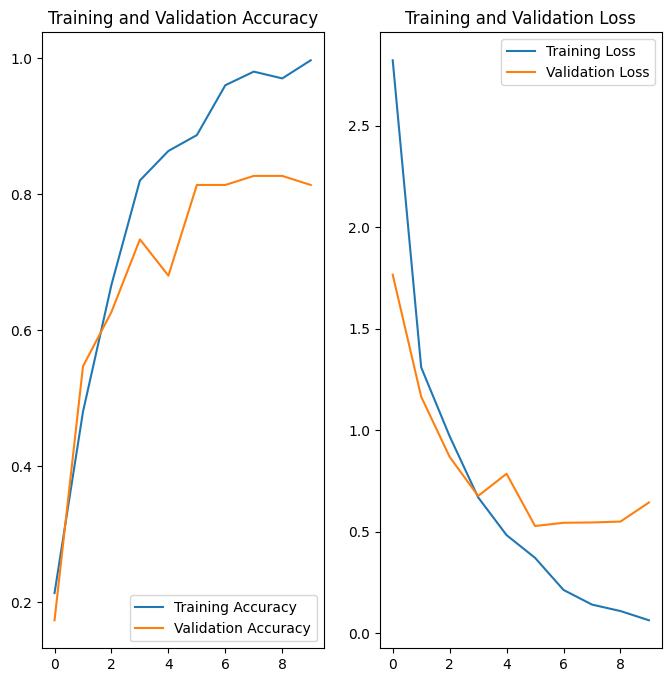

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Hasil dari model ini sepertinya overfitting karena akurasi training bagus namun akurasi validation nya jelek


### mengubah jumlah filter menjadi 32

In [20]:
# Buat model
model = tf.keras.models.Sequential([

  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
epochs=6
history = model.fit(
 ds_train,
 validation_data=ds_validation,
 epochs=epochs
)

Epoch 1/6
10/10 [==============================] - 18s 2s/step - loss: 4.3027 - accuracy: 0.2433 - val_loss: 1.5802 - val_accuracy: 0.1867
Epoch 2/6
10/10 [==============================] - 15s 1s/step - loss: 1.2905 - accuracy: 0.4667 - val_loss: 0.8928 - val_accuracy: 0.5733
Epoch 3/6
10/10 [==============================] - 17s 1s/step - loss: 0.8259 - accuracy: 0.6533 - val_loss: 0.8275 - val_accuracy: 0.6667
Epoch 4/6
10/10 [==============================] - 16s 1s/step - loss: 0.6038 - accuracy: 0.7400 - val_loss: 0.9019 - val_accuracy: 0.7333
Epoch 5/6
10/10 [==============================] - 16s 1s/step - loss: 0.4095 - accuracy: 0.8667 - val_loss: 0.6582 - val_accuracy: 0.8133
Epoch 6/6
10/10 [==============================] - 16s 1s/step - loss: 0.3138 - accuracy: 0.9333 - val_loss: 0.6514 - val_accuracy: 0.7867


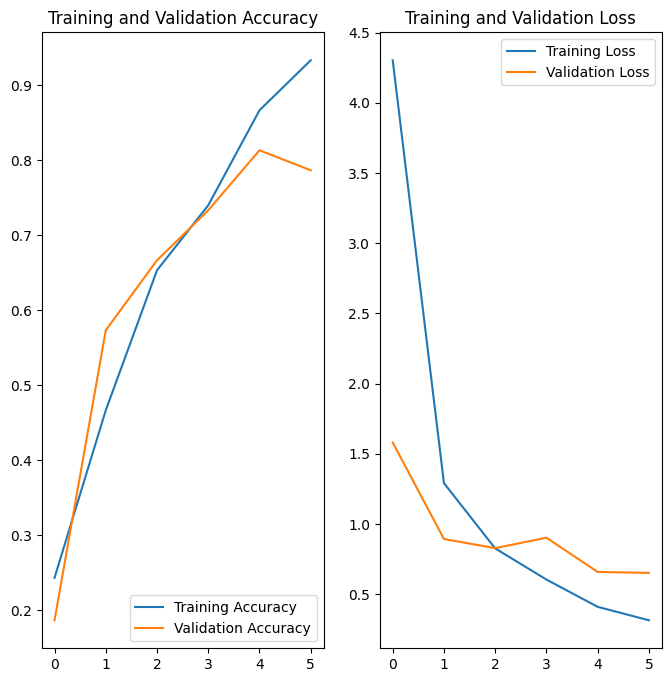

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model ini masih overfitting

### mengurangi jumlah layer, jumlah filter tetap

In [24]:
# Buat model
model = tf.keras.models.Sequential([

  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
epochs=10
history = model.fit(
 ds_train,
 validation_data=ds_validation,
 epochs=epochs
)

Epoch 1/10
10/10 [==============================] - 20s 2s/step - loss: 50.4294 - accuracy: 0.1900 - val_loss: 11.7646 - val_accuracy: 0.1600
Epoch 2/10
10/10 [==============================] - 16s 1s/step - loss: 7.4484 - accuracy: 0.2467 - val_loss: 3.4197 - val_accuracy: 0.2400
Epoch 3/10
10/10 [==============================] - 17s 1s/step - loss: 1.9794 - accuracy: 0.4100 - val_loss: 1.0117 - val_accuracy: 0.5600
Epoch 4/10
10/10 [==============================] - 16s 1s/step - loss: 0.8814 - accuracy: 0.6733 - val_loss: 0.8251 - val_accuracy: 0.6667
Epoch 5/10
10/10 [==============================] - 17s 1s/step - loss: 0.6003 - accuracy: 0.7967 - val_loss: 0.9729 - val_accuracy: 0.6800
Epoch 6/10
10/10 [==============================] - 16s 1s/step - loss: 0.4697 - accuracy: 0.8633 - val_loss: 0.5867 - val_accuracy: 0.8267
Epoch 7/10
10/10 [==============================] - 16s 1s/step - loss: 0.2952 - accuracy: 0.9467 - val_loss: 0.5512 - val_accuracy: 0.7867
Epoch 8/10
10/10 [

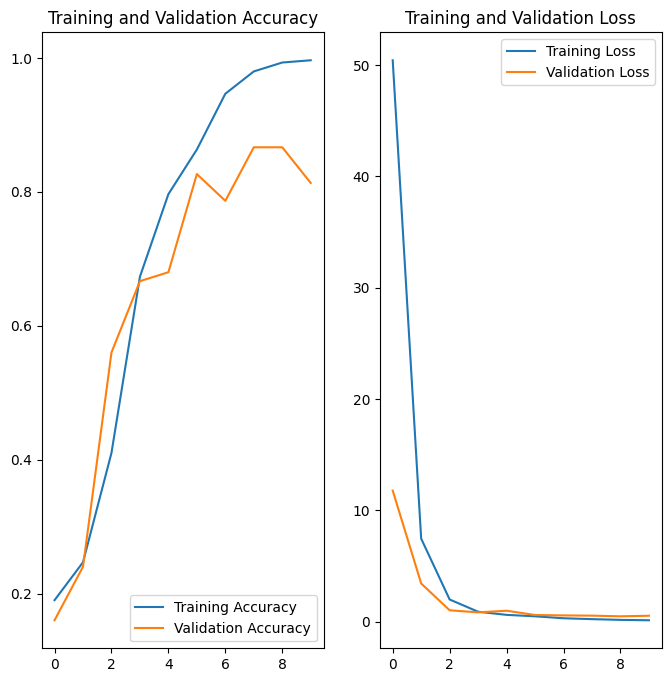

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model masih overfitting

### membuat model baru untuk mencegah overfitting dengan menggunakan augmentasi data training

In [28]:
data_augmentation = ds_train
data_augmentation = keras.Sequential(
 [
   layers.RandomFlip("horizontal",
                     input_shape=(180,
                                 180,
                                 3)),
   layers.RandomRotation(0.1),
   layers.RandomZoom(0.1),
 ]
)


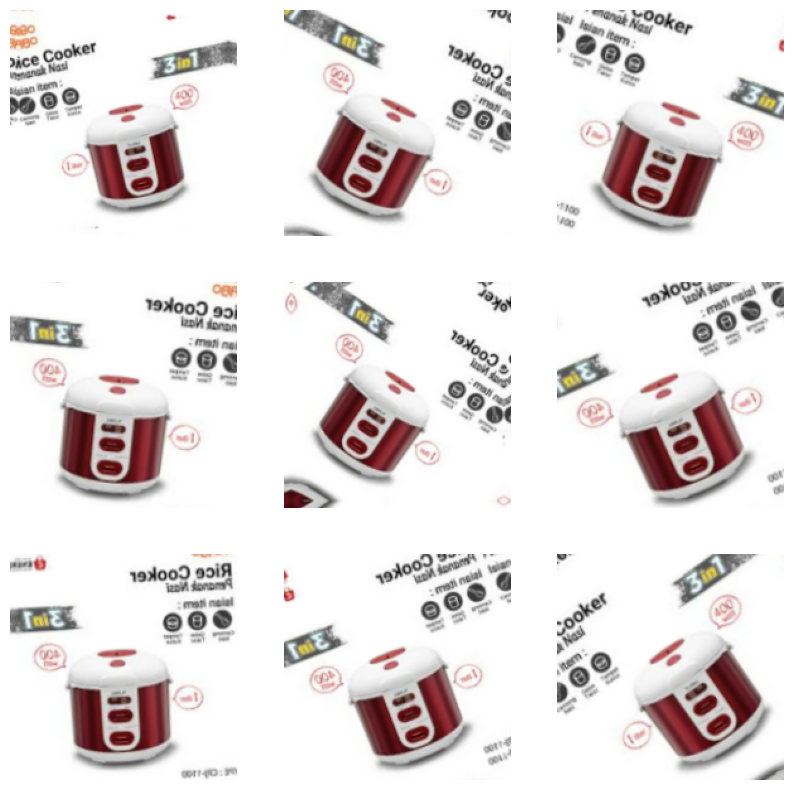

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in ds_train.take(1):
 for i in range(9):
   augmented_images = data_augmentation(images)
   ax = plt.subplot(3, 3, i + 1)
   plt.imshow(augmented_images[0].numpy().astype("uint8"))
   plt.axis("off")


In [30]:
# Buat model
model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
epochs=15
history = model.fit(
 ds_train,
 validation_data=ds_validation,
 epochs=epochs
)

Epoch 1/15
10/10 [==============================] - 19s 2s/step - loss: 24.2309 - accuracy: 0.2000 - val_loss: 5.9059 - val_accuracy: 0.2400
Epoch 2/15
10/10 [==============================] - 18s 2s/step - loss: 4.8686 - accuracy: 0.2167 - val_loss: 2.1248 - val_accuracy: 0.3467
Epoch 3/15
10/10 [==============================] - 18s 2s/step - loss: 1.5862 - accuracy: 0.3167 - val_loss: 1.2840 - val_accuracy: 0.3333
Epoch 4/15
10/10 [==============================] - 18s 2s/step - loss: 1.2937 - accuracy: 0.4200 - val_loss: 1.0616 - val_accuracy: 0.6533
Epoch 5/15
10/10 [==============================] - 18s 1s/step - loss: 1.1636 - accuracy: 0.5400 - val_loss: 0.9259 - val_accuracy: 0.6400
Epoch 6/15
10/10 [==============================] - 19s 2s/step - loss: 1.0337 - accuracy: 0.6100 - val_loss: 0.8388 - val_accuracy: 0.6933
Epoch 7/15
10/10 [==============================] - 17s 1s/step - loss: 0.9465 - accuracy: 0.6400 - val_loss: 0.7288 - val_accuracy: 0.7333
Epoch 8/15
10/10 [=

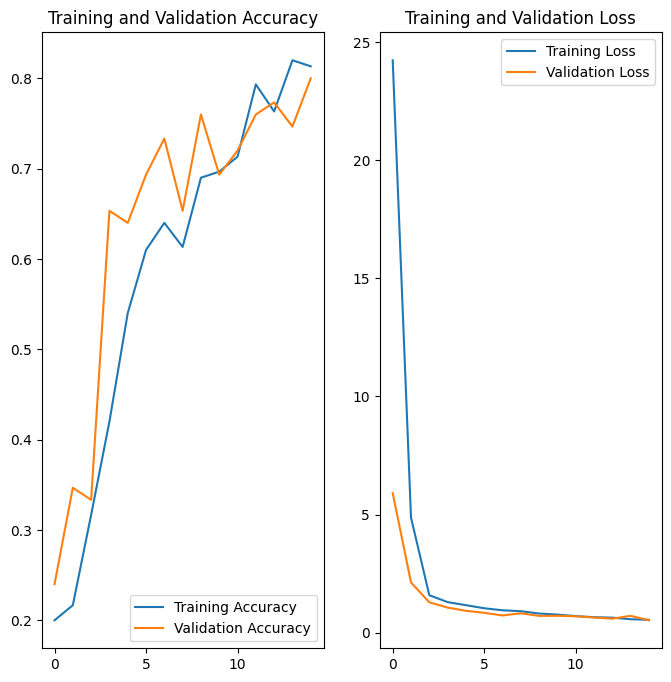

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

selisih akurasi data training dan data validation sudah tidak terlalu jauh

### membuat model baru untuk mencegah overfitting dengan menggunakan dropout

In [34]:
# Buat model
model = tf.keras.models.Sequential([

  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),

  layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
epochs=15
history = model.fit(
 ds_train,
 validation_data=ds_validation,
 epochs=epochs
)

Epoch 1/15
10/10 [==============================] - 18s 1s/step - loss: 36.6223 - accuracy: 0.1800 - val_loss: 12.7396 - val_accuracy: 0.2000
Epoch 2/15
10/10 [==============================] - 16s 1s/step - loss: 7.1793 - accuracy: 0.3200 - val_loss: 2.3283 - val_accuracy: 0.3867
Epoch 3/15
10/10 [==============================] - 17s 1s/step - loss: 1.4914 - accuracy: 0.4900 - val_loss: 1.1890 - val_accuracy: 0.5333
Epoch 4/15
10/10 [==============================] - 16s 1s/step - loss: 0.6976 - accuracy: 0.7000 - val_loss: 0.7789 - val_accuracy: 0.6933
Epoch 5/15
10/10 [==============================] - 16s 1s/step - loss: 0.4993 - accuracy: 0.8967 - val_loss: 0.7049 - val_accuracy: 0.7867
Epoch 6/15
10/10 [==============================] - 17s 2s/step - loss: 0.3356 - accuracy: 0.9633 - val_loss: 0.5874 - val_accuracy: 0.8667
Epoch 7/15
10/10 [==============================] - 17s 1s/step - loss: 0.1978 - accuracy: 1.0000 - val_loss: 0.6847 - val_accuracy: 0.7867
Epoch 8/15
10/10 [

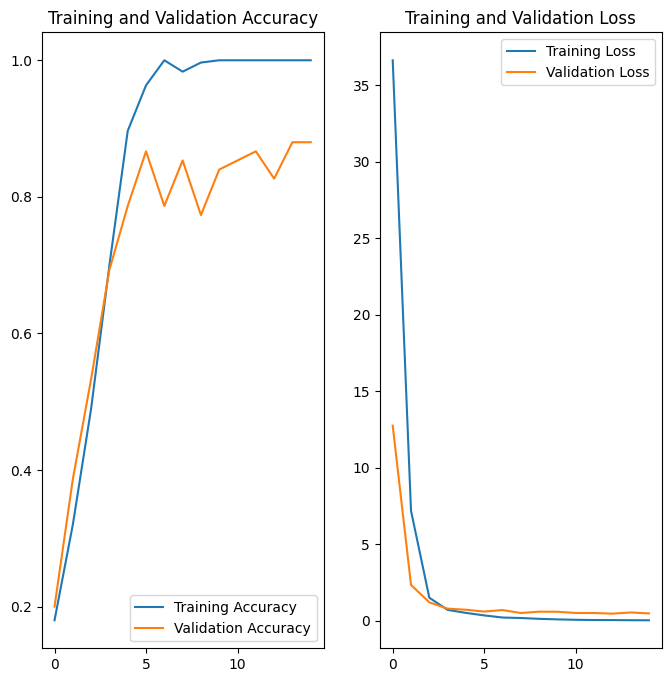

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model ini overfitting

### Membuat model baru dengan augmentasi data train namun menambah jumlah layer

In [38]:
# Buat model
model = tf.keras.models.Sequential([

  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(180, 180, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
epochs=15
history = model.fit(
 ds_train,
 validation_data=ds_validation,
 epochs=epochs
)

Epoch 1/15
10/10 [==============================] - 18s 1s/step - loss: 3.0579 - accuracy: 0.2300 - val_loss: 1.5286 - val_accuracy: 0.4933
Epoch 2/15
10/10 [==============================] - 13s 859ms/step - loss: 1.5066 - accuracy: 0.3533 - val_loss: 1.3017 - val_accuracy: 0.6400
Epoch 3/15
10/10 [==============================] - 12s 1s/step - loss: 1.2557 - accuracy: 0.5500 - val_loss: 1.1515 - val_accuracy: 0.3600
Epoch 4/15
10/10 [==============================] - 14s 1s/step - loss: 1.0715 - accuracy: 0.6000 - val_loss: 0.7791 - val_accuracy: 0.6667
Epoch 5/15
10/10 [==============================] - 13s 1s/step - loss: 0.9564 - accuracy: 0.6733 - val_loss: 0.6913 - val_accuracy: 0.7467
Epoch 6/15
10/10 [==============================] - 11s 864ms/step - loss: 0.8043 - accuracy: 0.7000 - val_loss: 0.6664 - val_accuracy: 0.7733
Epoch 7/15
10/10 [==============================] - 14s 1s/step - loss: 0.6941 - accuracy: 0.7433 - val_loss: 0.5377 - val_accuracy: 0.8000
Epoch 8/15
10/

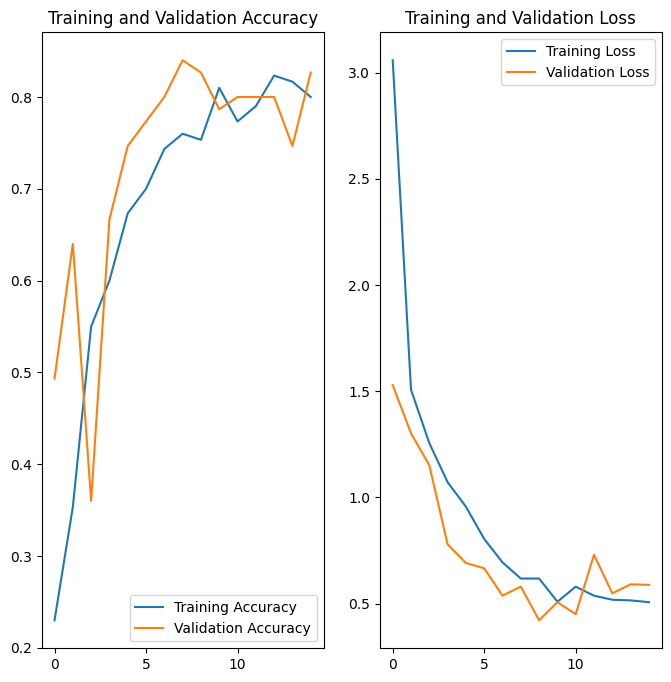

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Test Gambar Baru

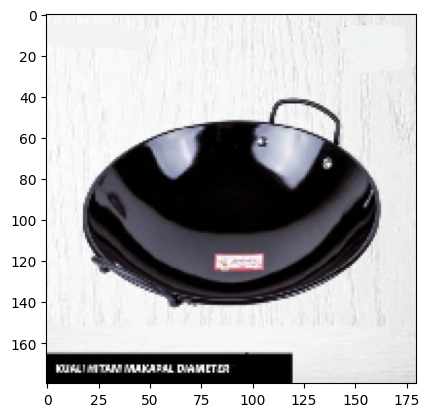

In [42]:
from tensorflow.keras.preprocessing.image import load_img
baru_path = "/content/gdrive/MyDrive/Klasifikasi Alat Masak/Gambar_Baru/baru_1.jpg"

img = load_img(
    baru_path, target_size=(180, 180)
)

plt.imshow(img)
plt.show()

In [43]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "Gambar tersebut termasuk kedalam kelas {} dengan tingkat akurasi {:.2f}."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 120ms/step
Gambar tersebut termasuk kedalam kelas Rice cooker dengan tingkat akurasi 39.63.


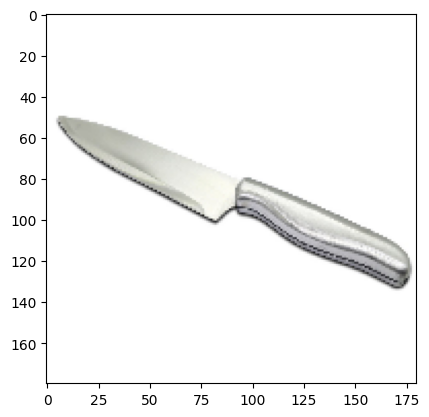

In [44]:
from tensorflow.keras.preprocessing.image import load_img
baru_path = "/content/gdrive/MyDrive/Klasifikasi Alat Masak/Gambar_Baru/baru_2.jpg"

img = load_img(
    baru_path, target_size=(180, 180)
)

plt.imshow(img)
plt.show()

In [45]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "Gambar tersebut termasuk kedalam kelas {} dengan tingkat akurasi {:.2f}."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 36ms/step
Gambar tersebut termasuk kedalam kelas Pisau dapur dengan tingkat akurasi 39.19.


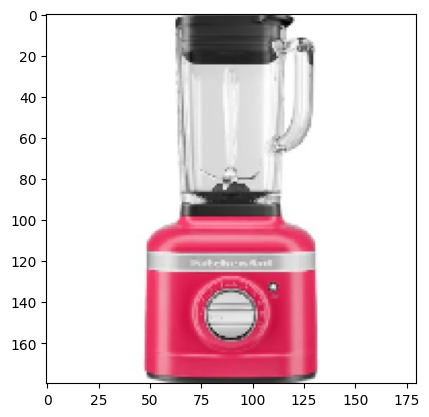

In [46]:
from tensorflow.keras.preprocessing.image import load_img
baru_path = "/content/gdrive/MyDrive/Klasifikasi Alat Masak/Gambar_Baru/baru_3.jpg"

img = load_img(
    baru_path, target_size=(180, 180)
)

plt.imshow(img)
plt.show()

In [47]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "Gambar tersebut termasuk kedalam kelas {} dengan tingkat akurasi {:.2f}."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 29ms/step
Gambar tersebut termasuk kedalam kelas Blender dengan tingkat akurasi 40.29.


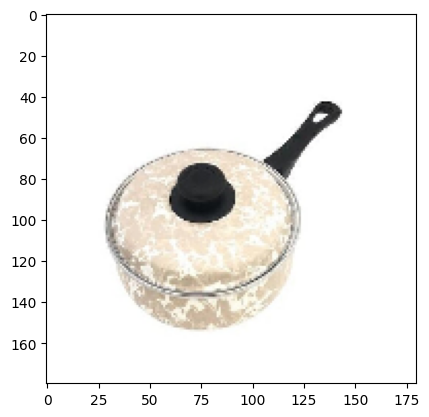

In [48]:
from tensorflow.keras.preprocessing.image import load_img
baru_path = "/content/gdrive/MyDrive/Klasifikasi Alat Masak/Gambar_Baru/baru_4.jpg"

img = load_img(
    baru_path, target_size=(180, 180)
)

plt.imshow(img)
plt.show()

In [49]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "Gambar tersebut termasuk kedalam kelas {} dengan tingkat akurasi {:.2f}."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 28ms/step
Gambar tersebut termasuk kedalam kelas Rice cooker dengan tingkat akurasi 28.78.


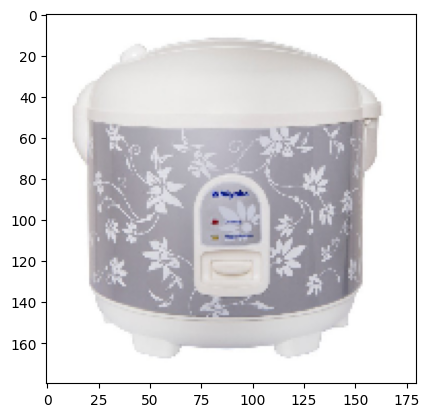

In [50]:
from tensorflow.keras.preprocessing.image import load_img
baru_path = "/content/gdrive/MyDrive/Klasifikasi Alat Masak/Gambar_Baru/baru_5.jpg"

img = load_img(
    baru_path, target_size=(180, 180)
)

plt.imshow(img)
plt.show()

In [51]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "Gambar tersebut termasuk kedalam kelas {} dengan tingkat akurasi {:.2f}."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 28ms/step
Gambar tersebut termasuk kedalam kelas Rice cooker dengan tingkat akurasi 31.11.
